# IDAO

In [3]:
import pandas as pd
import numpy as np
import catboost

In [4]:
df = pd.read_csv("train.csv")
df

,id3,user_id,id2,date,id1
0,714,464300,34,1,4
1,714,915655,34,1,4
2,316,262696,42,1,2
3,52,354280,4,1,10
4,581,218912,14,1,10
5,590,1029729,63,1,9
6,279,14946,49,1,4
7,783,14946,58,1,6
8,613,638732,3,1,6
9,254,1072612,37,1,6


### Категории

In [14]:
cat3 = np.sort(df["id3"].unique())
cat3

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [15]:
df1 = df.drop_duplicates("id3")
graph1 = df1.groupby('id3')['id1'].apply(list)
graph2 = df1.groupby('id3')['id2'].apply(list)
result = pd.concat([graph1, graph2], axis=1)
dictionary = result.to_dict('index')

In [6]:
dictionary

{0: {'id1': [15], 'id2': [71]},
 1: {'id1': [15], 'id2': [35]},
 2: {'id1': [13], 'id2': [31]},
 3: {'id1': [6], 'id2': [89]},
 4: {'id1': [4], 'id2': [20]},
 5: {'id1': [5], 'id2': [17]},
 6: {'id1': [9], 'id2': [109]},
 7: {'id1': [1], 'id2': [41]},
 8: {'id1': [4], 'id2': [32]},
 9: {'id1': [14], 'id2': [43]},
 10: {'id1': [9], 'id2': [12]},
 11: {'id1': [7], 'id2': [22]},
 12: {'id1': [15], 'id2': [77]},
 13: {'id1': [2], 'id2': [120]},
 14: {'id1': [12], 'id2': [8]},
 15: {'id1': [4], 'id2': [53]},
 16: {'id1': [6], 'id2': [3]},
 17: {'id1': [2], 'id2': [42]},
 18: {'id1': [0], 'id2': [13]},
 19: {'id1': [14], 'id2': [93]},
 20: {'id1': [4], 'id2': [9]},
 21: {'id1': [15], 'id2': [70]},
 22: {'id1': [4], 'id2': [20]},
 23: {'id1': [14], 'id2': [48]},
 24: {'id1': [6], 'id2': [58]},
 25: {'id1': [9], 'id2': [56]},
 26: {'id1': [1], 'id2': [86]},
 27: {'id1': [14], 'id2': [50]},
 28: {'id1': [9], 'id2': [16]},
 29: {'id1': [10], 'id2': [117]},
 30: {'id1': [1], 'id2': [75]},
 31: {'

In [10]:
def get_category(id3):
    return [dictionary[id3]['id1'][0], dictionary[id3]['id2'][0]]

def number_of_diff_categories1(arr):
    q = []
    for i in arr:
        q.append(get_category(i)[0])
    return(len(list(set(q))))

In [11]:
import itertools
import operator

def most_common(L):
  # get an iterable of (item, iterable) pairs
  SL = sorted((x, i) for i, x in enumerate(L))
  # print 'SL:', SL
  groups = itertools.groupby(SL, key=operator.itemgetter(0))
  # auxiliary function to get "quality" for an item
  def _auxfun(g):
    item, iterable = g
    count = 0
    min_index = len(L)
    for _, where in iterable:
      count += 1
      min_index = min(min_index, where)
    # print 'item %r, count %r, minind %r' % (item, count, min_index)
    return count, -min_index
  # pick the highest-count/earliest item
  return max(groups, key=_auxfun)[0]

In [12]:
def top_cat1(l):
    temp =  []
    for i in l:
        temp.append(get_category(i)[0])
    return most_common(temp)

def top_cat2(l):
    temp =  []
    for i in l:
        temp.append(get_category(i)[1])
    return most_common(temp)

### По дням

In [8]:
date = df["date"].value_counts()
date = date.reset_index().values
date = np.sort(date, axis=0) 
date

array([[      1,   18758],
       [      2,   36137],
       [      3,  439614],
       [      4,  466565],
       [      5,  473595],
       [      6,  503346],
       [      7,  559562],
       [      8,  576009],
       [      9,  592337],
       [     10,  601596],
       [     11,  602625],
       [     12,  608712],
       [     13,  617047],
       [     14,  622331],
       [     15,  653493],
       [     16,  664658],
       [     17,  670045],
       [     18,  702887],
       [     19,  810880],
       [     20,  821213],
       [     21,  833421],
       [     22,  851506],
       [     23,  867898],
       [     24,  877321],
       [     25,  878927],
       [     26,  900395],
       [     27,  924407],
       [     28,  934615],
       [     29,  948754],
       [     30,  948862],
       [     31,  967263],
       [     32,  989878],
       [     33,  990063],
       [     34,  998633],
       [     35, 1015839],
       [     36, 1036980],
       [     37, 1056584],
 

In [9]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

In [10]:
date[:,1]

array([  18758,   36137,  439614,  466565,  473595,  503346,  559562,
        576009,  592337,  601596,  602625,  608712,  617047,  622331,
        653493,  664658,  670045,  702887,  810880,  821213,  833421,
        851506,  867898,  877321,  878927,  900395,  924407,  934615,
        948754,  948862,  967263,  989878,  990063,  998633, 1015839,
       1036980, 1056584, 1098506, 1107362, 1112158, 1138318, 1140566,
       1156975, 1160369, 1163106, 1163357, 1167501, 1179944, 1194955,
       1217522, 1221207, 1231839, 1237514, 1242873], dtype=int64)

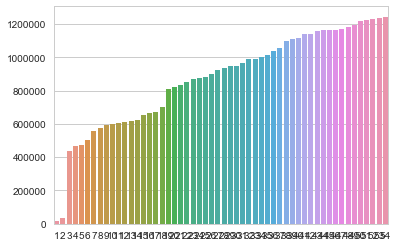

In [11]:
sns.barplot(x = date[:,0], y = date[:,1])

### Пользователи

In [5]:
users= np.sort(np.matrix(df["user_id"].unique()))
users

matrix([[      0,       1,       2, ..., 1179569, 1179570, 1179571]], dtype=int64)

In [6]:
users = df.groupby('user_id')['id3'].apply(list)

In [7]:
users = users.to_frame()

In [8]:
users

,id3
user_id,
0,"[685, 400, 457, 428, 610, 897, 666, 283, 340, ..."
1,"[610, 610, 610, 610, 610, 610]"
2,"[710, 528, 142, 481]"
3,"[190, 70, 735, 36, 410, 704, 322, 171, 659, 61..."
5,"[630, 269]"
6,"[581, 451]"
7,"[523, 741, 51, 685, 800, 581, 129]"
8,"[685, 604, 134]"
9,"[875, 875, 875, 255, 255, 416, 58, 774, 347, 9..."


In [16]:
users["count"] = users["id3"].apply(len)
users["cat1"] = users["id3"].apply(number_of_diff_categories1)
users = users.sort_values(by=['count'], ascending=False)

users

,id3,count,cat1
user_id,,,
241117,"[130, 670, 126, 382, 489, 716, 324, 486, 834, ...",19041,16
351837,"[902, 839, 51, 53, 763, 177, 255, 743, 767, 37...",17898,16
733408,"[160, 353, 862, 717, 105, 442, 147, 617, 707, ...",16963,16
1009457,"[308, 617, 577, 148, 60, 217, 715, 693, 128, 6...",16001,16
484840,"[760, 221, 777, 796, 348, 673, 479, 505, 223, ...",14016,16
125350,"[478, 916, 316, 549, 369, 114, 324, 861, 94, 7...",13304,16
247312,"[69, 411, 685, 255, 138, 72, 783, 647, 750, 66...",12843,16
558541,"[766, 860, 685, 485, 14, 458, 146, 150, 596, 2...",12818,16
785655,"[483, 656, 763, 920, 916, 795, 760, 704, 576, ...",12648,16


In [17]:
users['top_subcategory'] = users['id3'].apply(top_cat2)
users

,id3,count,cat1,top_subcategory
user_id,,,,
241117,"[130, 670, 126, 382, 489, 716, 324, 486, 834, ...",19041,16,2
351837,"[902, 839, 51, 53, 763, 177, 255, 743, 767, 37...",17898,16,47
733408,"[160, 353, 862, 717, 105, 442, 147, 617, 707, ...",16963,16,47
1009457,"[308, 617, 577, 148, 60, 217, 715, 693, 128, 6...",16001,16,47
484840,"[760, 221, 777, 796, 348, 673, 479, 505, 223, ...",14016,16,92
125350,"[478, 916, 316, 549, 369, 114, 324, 861, 94, 7...",13304,16,92
247312,"[69, 411, 685, 255, 138, 72, 783, 647, 750, 66...",12843,16,2
558541,"[766, 860, 685, 485, 14, 458, 146, 150, 596, 2...",12818,16,2
785655,"[483, 656, 763, 920, 916, 795, 760, 704, 576, ...",12648,16,92


In [18]:
users.to_csv("users.csv")

### Popularity model

In [23]:
popular = pd.read_csv("popular.csv")
p = np.array(popular.values.tolist())
p

array([[    610, 2926211,       9,      12],
       [    581,  824036,      10,      14],
       [    875,  800398,      10,       4],
       ..., 
       [    178,       1,      12,      84],
       [    870,       1,       5,      38],
       [    395,       1,      10,       2]])

In [41]:
def popularity_pred(l):
    id2 = top_cat2(l)
    s = popular[popular['category2'] == id2]
    for index, row in s.iterrows():
        if row['id3'] not in l:
            return row['id3']
    return np.nan

def popularity_pred5(l):
    id2 = top_cat2(l)
    temp = []
    s = popular[popular['category2'] == id2]
    for index, row in s.iterrows():
        if row['id3'] not in l:
            if len(temp)<5:
                temp.append(row['id3'])
            else:
                return(temp)
    return -1

def

In [42]:
users['pred'] = users['id3'].apply(popularity_pred5)
users

,id3,count,cat1,top_subcategory,pred
user_id,,,,,
241117,"[130, 670, 126, 382, 489, 716, 324, 486, 834, ...",19041,16,2,-1
351837,"[902, 839, 51, 53, 763, 177, 255, 743, 767, 37...",17898,16,47,"[698, 566, 46, 120, 835]"
733408,"[160, 353, 862, 717, 105, 442, 147, 617, 707, ...",16963,16,47,"[698, 566, 46, 120, 835]"
1009457,"[308, 617, 577, 148, 60, 217, 715, 693, 128, 6...",16001,16,47,"[698, 566, 46, 120, 835]"
484840,"[760, 221, 777, 796, 348, 673, 479, 505, 223, ...",14016,16,92,-1
125350,"[478, 916, 316, 549, 369, 114, 324, 861, 94, 7...",13304,16,92,-1
247312,"[69, 411, 685, 255, 138, 72, 783, 647, 750, 66...",12843,16,2,-1
558541,"[766, 860, 685, 485, 14, 458, 146, 150, 596, 2...",12818,16,2,-1
785655,"[483, 656, 763, 920, 916, 795, 760, 704, 576, ...",12648,16,92,-1


In [65]:
users.shape

(1079572, 5)

In [66]:
users[users['count']>1].shape

(944043, 5)

### Финализируем

In [61]:
import math
result = users[users['pred']!=-1][0:53979]

In [62]:
result = result.drop(['id3', 'count','cat1','top_subcategory'], axis=1)
result[['id3_1','id3_2','id3_3','id3_4','id3_5']] = pd.DataFrame(result.pred.values.tolist(), index= result.index)
result = result.drop(['pred'], axis=1)
result

,id3_1,id3_2,id3_3,id3_4,id3_5
user_id,,,,,
351837,698,566,46,120,835
733408,698,566,46,120,835
1009457,698,566,46,120,835
452880,166,794,558,874,54
837384,558,874,54,523,199
318372,166,794,558,874,54
725319,166,794,558,874,54
784394,166,794,558,874,54
184175,340,753,347,115,412


In [64]:
result.to_csv("answer_1.csv")